In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set my local_path
local_path="D:/Ranjeet/my_learning/machine_learning/UpxAcademy/DataAnalyticswithPython/project/attachment_attachment_Project_Datasets/Project Datasets/attachment_Project_3_Wine_Quality_data/"

In [3]:
#defining ColumnName for Data
wine_data_column=['fixedacidity','volatileacidity','citricacid','residualsugar','chlorides','freesulfurdioxide',
             'totalsulfurdioxide','density','pH','sulphates','alcohol','quality']

# reading wine data from csv file excluding ColumnHeading (Row1) with given columnname as 'wine_data_column'
wine_data_fromCSVFile=pd.read_csv(local_path+'winequality.csv',sep=';',names=wine_data_column,skiprows=1)
#wine_data_fromCSVFile.columns
wine_data_fromCSVFile.head() # view first 5 Records of wine data

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
### experminting with data Transpose , but not useful 
# new_data=wine_data_fromCSVFile.T
# new_data.head()

In [5]:
# total number of wine data-set
wine_data_fromCSVFile.shape

(1599, 12)

In [ ]:
### data-set contains 12 columns/attributes with 1599 records

In [6]:
wine_data_fromCSVFile.dtypes # see type of data in each column, 'quality' is mentioned in integer, all other are float

fixedacidity          float64
volatileacidity       float64
citricacid            float64
residualsugar         float64
chlorides             float64
freesulfurdioxide     float64
totalsulfurdioxide    float64
density               float64
pH                    float64
sulphates             float64
alcohol               float64
quality                 int64
dtype: object

In [7]:
wine_data_fromCSVFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixedacidity          1599 non-null float64
volatileacidity       1599 non-null float64
citricacid            1599 non-null float64
residualsugar         1599 non-null float64
chlorides             1599 non-null float64
freesulfurdioxide     1599 non-null float64
totalsulfurdioxide    1599 non-null float64
density               1599 non-null float64
pH                    1599 non-null float64
sulphates             1599 non-null float64
alcohol               1599 non-null float64
quality               1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### no columns is having missing data .
### all columns are floating value except quality which is of integer type

In [8]:
# checking if there is any column having any empty data
## another way to find if there is any missing data 
wine_data_fromCSVFile.isna().sum()

fixedacidity          0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

In [9]:
wine_data_fromCSVFile['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
len(wine_data_fromCSVFile['quality'].unique())

6

In [11]:
wine_data_summary = wine_data_fromCSVFile.describe()
wine_data_summary

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
###
# 1- fixedacidity is not having many outlier as 75% of data lies within 9.2 as compared to its mean value (8.3)
# 2- volatileacidity in data is also havving mostly within 3rd quartile value (0.64)
# 3- citricacid is having many outliers as mean (2.538806) vs 75% values (2.600000)
# also std is much as compare to others
# 4- residualsugar is having high std 
# 5- chlorides 
# 6- freesulfurdioxide is having high std (10.46)
# 7- totalsulfurdioxide is having high std (32.89)
# 8- density not much difference between mean & mdeian value as std is very less
# 9- pH is also having less std value , so not much difference between mean & median
# 10- sulphates not  much std value as compare to mean value
# 11- alcohol not much std value as mean & median value

fixedacidity data couurance based on range -----


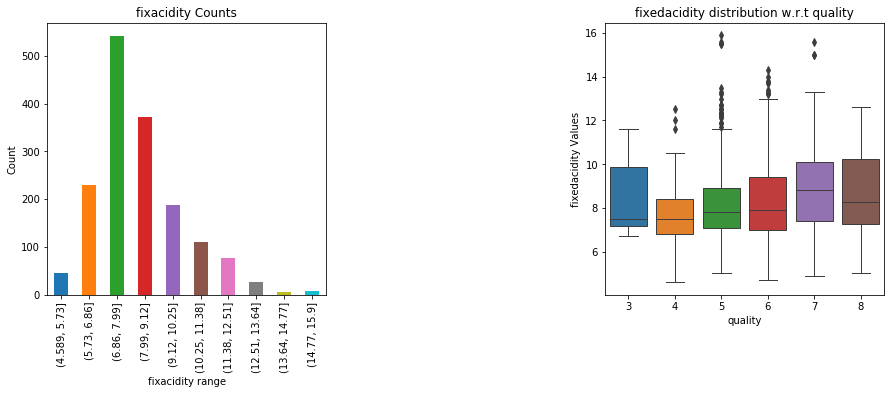

,count,mean,std,min,25%,50%,75%,max
fixedacidity,1599.0,8.319637,1.741096,4.6,7.1,7.9,9.2,15.9


In [12]:
#fixedacidity Analysis
print('fixedacidity data couurance based on range -----')

plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace= 0.3, wspace= 1.0)

plt.subplot(1,2,1)
#print(pd.cut(wine_data_fromCSVFile['fixedacidity'],10).value_counts().sort_index())
pd.cut(wine_data_fromCSVFile['fixedacidity'],10).value_counts().sort_index().plot.bar()
plt.xlabel('fixacidity range')
plt.ylabel('Count')
plt.title('fixacidity Counts')

plt.subplot(1,2,2)
sns.boxplot(x='quality',y='fixedacidity',data=wine_data_fromCSVFile,linewidth=1)
plt.title('fixedacidity distribution w.r.t quality')
plt.ylabel('fixedacidity Values')

plt.show()
wine_data_fromCSVFile[['fixedacidity']].describe().T

### dividing fixedacidity based on range , seems maximum occurance between 6.86, 7.99
### wine quality 5 is having maximum outliers as compare to other groups
### quality7 have mean & median value approx same

 ----volatileacidity data couurance based on range -----


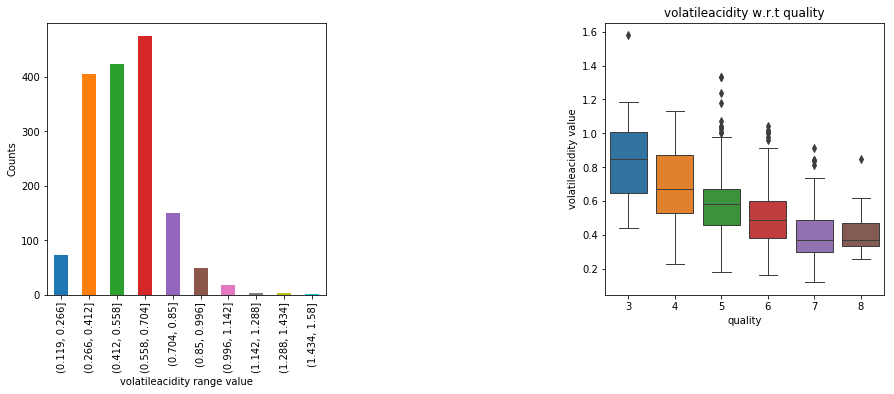

,count,mean,std,min,25%,50%,75%,max
volatileacidity,1599.0,0.527821,0.17906,0.12,0.39,0.52,0.64,1.58


In [13]:
# volatileacidity Analysis
#wine_data_fromCSVFile.volatileacidity.describe()
print(' ----volatileacidity data couurance based on range -----')

plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace= 0.3, wspace= 1.0)

plt.subplot(1,2,1)
#print(pd.cut(wine_data_fromCSVFile['volatileacidity'],10).value_counts().sort_index())
pd.cut(wine_data_fromCSVFile['volatileacidity'],10).value_counts().sort_index().plot.bar()
plt.xlabel('volatileacidity range value')
plt.ylabel('Counts')

plt.subplot(1,2,2)
sns.boxplot(x='quality',y='volatileacidity',data=wine_data_fromCSVFile,linewidth=1)
plt.ylabel('volatileacidity value')
plt.title('volatileacidity w.r.t quality')

plt.show()

wine_data_fromCSVFile[['volatileacidity']].describe().T

### most data lies between range value (0.558, 0.704)
### group 5 has maximum outlier occurance
### group 3 has maximum value 
### also as quality is getting better , average value of volatileacidity is getting decreases

 ----citricacid data occurance based on range -----


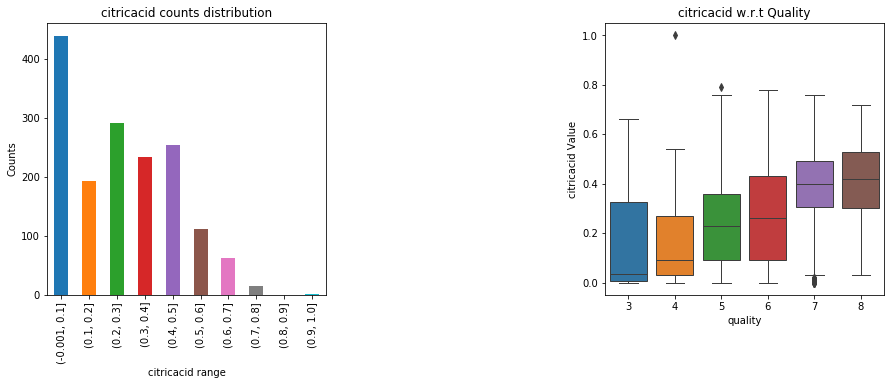

,count,mean,std,min,25%,50%,75%,max
citricacid,1599.0,0.270976,0.194801,0.0,0.09,0.26,0.42,1.0


In [14]:
# citricacid Analysis
print(' ----citricacid data occurance based on range -----')

plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.3, wspace=1.0)

plt.subplot(1,2,1)
#print(pd.cut(wine_data_fromCSVFile['citricacid'],10).value_counts().sort_index())
pd.cut(wine_data_fromCSVFile['citricacid'],10).value_counts().sort_index().plot.bar()
plt.xlabel('citricacid range')
plt.ylabel('Counts')
plt.title('citricacid counts distribution')

plt.subplot(1,2,2)
sns.boxplot(x='quality',y='citricacid',data=wine_data_fromCSVFile,linewidth=1)
plt.ylabel('citricacid Value')
plt.title('citricacid w.r.t Quality')

plt.show()

wine_data_fromCSVFile[['citricacid']].describe().T

### max occurance lies within range (-0.001, 0.1)
### group 3 and group 4 has some outliers while others don;t have 
### group 3 and group 4 , much difference between mean & median value , while for group 7 & group 8 mean & median are very close
### as the wine-quality increasse citricacid value also increase

 ----residualsugar data occurance based on range -----
(0.885, 2.36]     994
(2.36, 3.82]      463
(3.82, 5.28]       67
(5.28, 6.74]       45
(6.74, 8.2]        11
(8.2, 9.66]         8
(9.66, 11.12]       3
(11.12, 12.58]      0
(12.58, 14.04]      5
(14.04, 15.5]       3
Name: residualsugar, dtype: int64


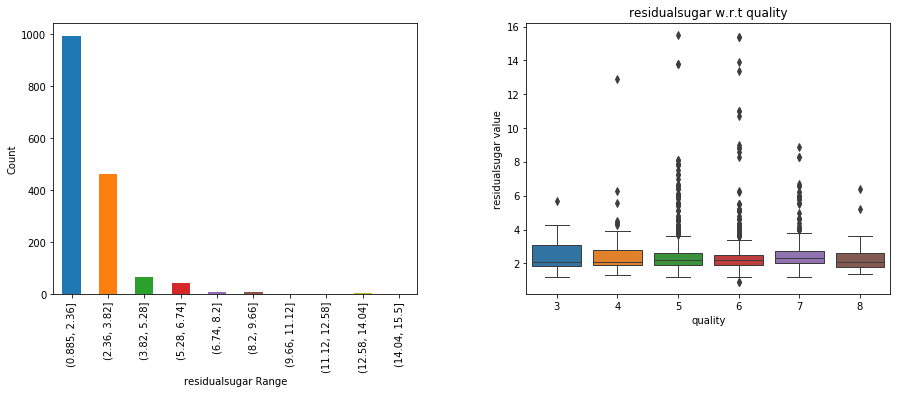

,count,mean,std,min,25%,50%,75%,max
residualsugar,1599.0,2.538806,1.409928,0.9,1.9,2.2,2.6,15.5


In [15]:
# residualsugar Analysis
print(' ----residualsugar data occurance based on range -----')

#plt.figure(figsize=(20,10))
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace =0.3, wspace =0.3)

plt.subplot(1,2,1)
print(pd.cut(wine_data_fromCSVFile['residualsugar'],10).value_counts().sort_index())
pd.cut(wine_data_fromCSVFile['residualsugar'],10).value_counts().sort_index().plot.bar()
plt.xlabel('residualsugar Range')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.boxplot(x='quality',y='residualsugar',data=wine_data_fromCSVFile,linewidth=1)
plt.ylabel('residualsugar value')
plt.title('residualsugar w.r.t quality')

plt.show()

wine_data_fromCSVFile[['residualsugar']].describe().T

### maximum data have residualsugar between range (0.885, 2.36)
### group 3 and group4 have large variation between mean and median value as compare to others 
### group 5 and group 6 have most outlier 

 ----chlorides data occurance based on range -----
(0.0114, 0.0719]     457
(0.0719, 0.132]     1064
(0.132, 0.192]        35
(0.192, 0.252]        18
(0.252, 0.312]         3
(0.312, 0.371]         8
(0.371, 0.431]        10
(0.431, 0.491]         2
(0.491, 0.551]         0
(0.551, 0.611]         2
Name: chlorides, dtype: int64


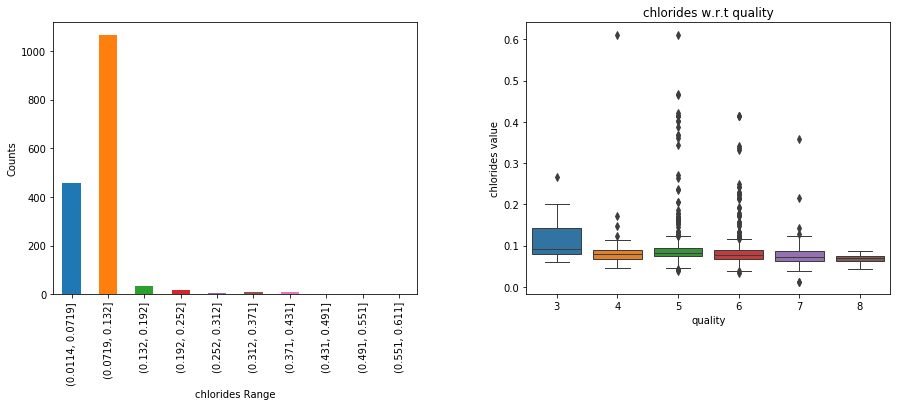

,count,mean,std,min,25%,50%,75%,max
chlorides,1599.0,0.087467,0.047065,0.012,0.07,0.079,0.09,0.611


In [16]:
# chlorides Analysis 
print(' ----chlorides data occurance based on range -----')

#plt.figure(figsize=(15,8))
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(1,2,1)
print(pd.cut(wine_data_fromCSVFile['chlorides'],10).value_counts().sort_index())
pd.cut(wine_data_fromCSVFile['chlorides'],10).value_counts().sort_index().plot.bar()
plt.xlabel('chlorides Range')
plt.ylabel('Counts')

plt.subplot(1,2,2)
sns.boxplot(x='quality',y='chlorides',data=wine_data_fromCSVFile,linewidth=1)
plt.ylabel('chlorides value')
plt.title('chlorides w.r.t quality')

plt.show()

wine_data_fromCSVFile[['chlorides']].describe().T

### maximum data is between range (0.0719, 0.132)
### group 5 and group 6 having many outliers 

 ----freesulfurdioxide data occurance based on range -----
(0.929, 15.2]    924
(15.2, 29.4]     496
(29.4, 43.6]     152
(43.6, 57.8]      23
(57.8, 72.0]       4
Name: freesulfurdioxide, dtype: int64


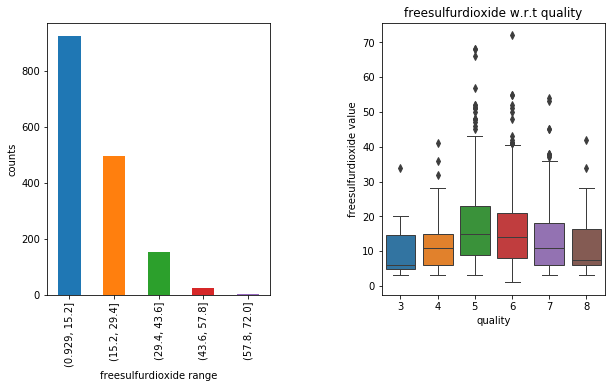

,count,mean,std,min,25%,50%,75%,max
freesulfurdioxide,1599.0,15.874922,10.460157,1.0,7.0,14.0,21.0,72.0


In [17]:
# freesulfurdioxide analysis 
print(' ----freesulfurdioxide data occurance based on range -----')

plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.3, wspace =0.5)

plt.subplot(1,2,1)
print(pd.cut(wine_data_fromCSVFile['freesulfurdioxide'],5).value_counts().sort_index())
pd.cut(wine_data_fromCSVFile['freesulfurdioxide'],5).value_counts().sort_index().plot.bar()
plt.xlabel('freesulfurdioxide range')
plt.ylabel('counts')

plt.subplot(1,2,2)
sns.boxplot(x='quality',y='freesulfurdioxide',data=wine_data_fromCSVFile,linewidth=1)
plt.ylabel('freesulfurdioxide value')
plt.title('freesulfurdioxide w.r.t quality')

plt.show()

wine_data_fromCSVFile[['freesulfurdioxide']].describe().T

### most of data lies between range (0.929, 8.1) & (8.1, 15.2)

 ----totalsulfurdioxide data occurance based on range -----
(5.717, 62.6]     1201
(62.6, 119.2]      334
(119.2, 175.8]      62
(175.8, 232.4]       0
(232.4, 289.0]       2
Name: totalsulfurdioxide, dtype: int64


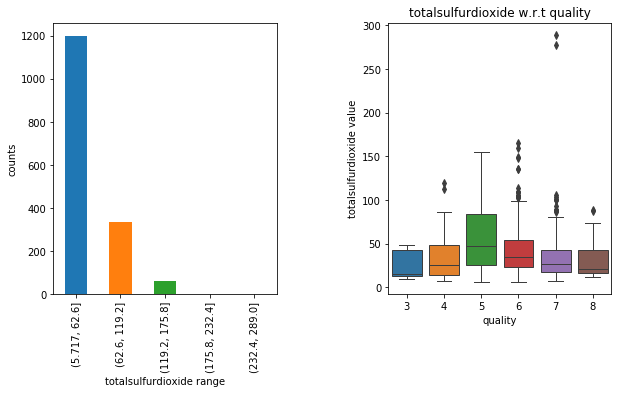

,count,mean,std,min,25%,50%,75%,max
totalsulfurdioxide,1599.0,46.467792,32.895324,6.0,22.0,38.0,62.0,289.0


In [18]:
# totalsulfurdioxide analysis 
print(' ----totalsulfurdioxide data occurance based on range -----')

plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.3, wspace=0.5)

plt.subplot(1,2,1)
print(pd.cut(wine_data_fromCSVFile['totalsulfurdioxide'],5).value_counts().sort_index())
pd.cut(wine_data_fromCSVFile['totalsulfurdioxide'],5).value_counts().sort_index().plot.bar()
plt.xlabel('totalsulfurdioxide range')
plt.ylabel('counts')

plt.subplot(1,2,2)
sns.boxplot(x='quality',y='totalsulfurdioxide',data=wine_data_fromCSVFile,linewidth=1)
plt.ylabel('totalsulfurdioxide value')
plt.title('totalsulfurdioxide w.r.t quality')

plt.show()

wine_data_fromCSVFile[['totalsulfurdioxide']].describe().T

### most of data lies in range (5.717, 34.3)
### min value 'totalsulfurdioxide' increases as quality improve 
### group 6 has most outliers, while group7 has highest value

 ----density data occurance based on range -----


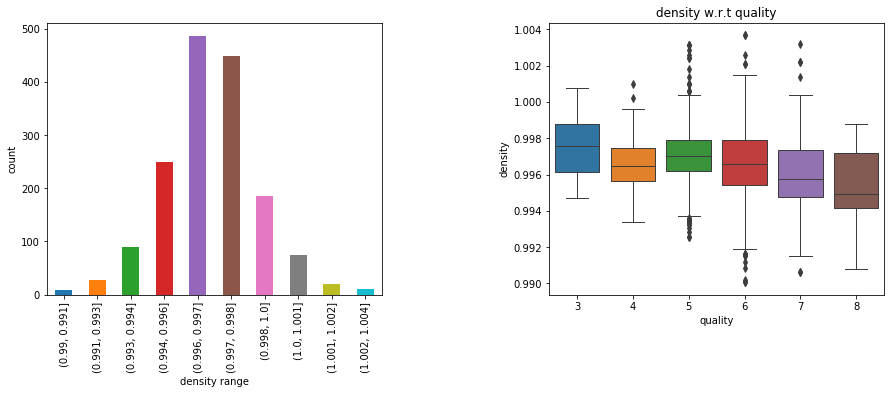

,count,mean,std,min,25%,50%,75%,max
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369


In [19]:
# density Analysis 
print(' ----density data occurance based on range -----')

plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.3, wspace=0.5)

plt.subplot(1,2,1)
#print(pd.cut(wine_data_fromCSVFile['density'],10).value_counts().sort_index())
pd.cut(wine_data_fromCSVFile['density'],10).value_counts().sort_index().plot.bar()
plt.xlabel('density range')
plt.ylabel('count')

plt.subplot(1,2,2)
sns.boxplot(x='quality',y='density',data=wine_data_fromCSVFile,linewidth=1)
plt.ylabel('density')
plt.title('density w.r.t quality')

plt.show()

wine_data_fromCSVFile[['density']].describe().T

### data is like bel-curve 
### most of data lies near center. with range (0.996, 0.997) & (0.997, 0.998)
### group 5 and group6 have outlier on both min/max side
### generally density descreases as quality improves except outlier

 ----pH data occurance based on range -----


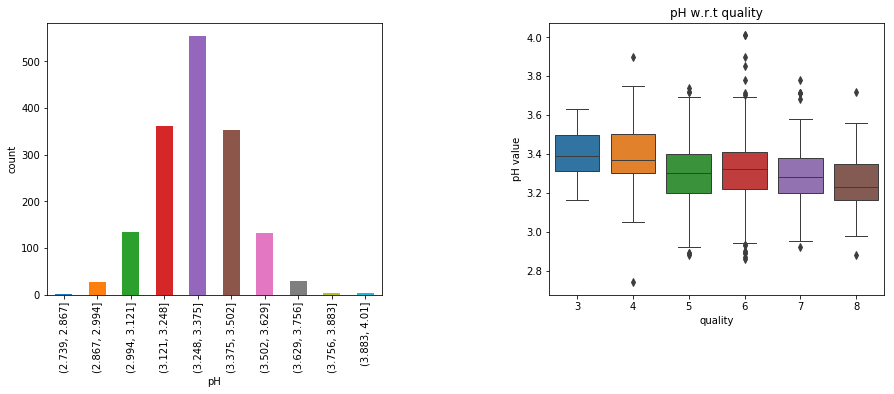

,count,mean,std,min,25%,50%,75%,max
pH,1599.0,3.311113,0.154386,2.74,3.21,3.31,3.4,4.01


In [20]:
# pH Analysis 
print(' ----pH data occurance based on range -----')

plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.3, wspace=.5)

plt.subplot(1,2,1)
#print(pd.cut(wine_data_fromCSVFile['pH'],10).value_counts().sort_index())
pd.cut(wine_data_fromCSVFile['pH'],10).value_counts().sort_index().plot.bar()
plt.xlabel('pH')
plt.ylabel('count')

plt.subplot(1,2,2)
sns.boxplot(x='quality',y='pH',data=wine_data_fromCSVFile,linewidth=1)
plt.ylabel('pH value')
plt.title('pH w.r.t quality')

plt.show()

wine_data_fromCSVFile[['pH']].describe().T

### looks like bel-curve with mostly data lies near center between range (3.248, 3.375)
### for pH, outliers are in every group , but group5 & group6 have most outlier

 ----sulphates data occurance based on range -----
(0.328, 0.664]    1006
(0.664, 0.998]     534
(0.998, 1.332]      47
(1.332, 1.666]       8
(1.666, 2.0]         4
Name: sulphates, dtype: int64


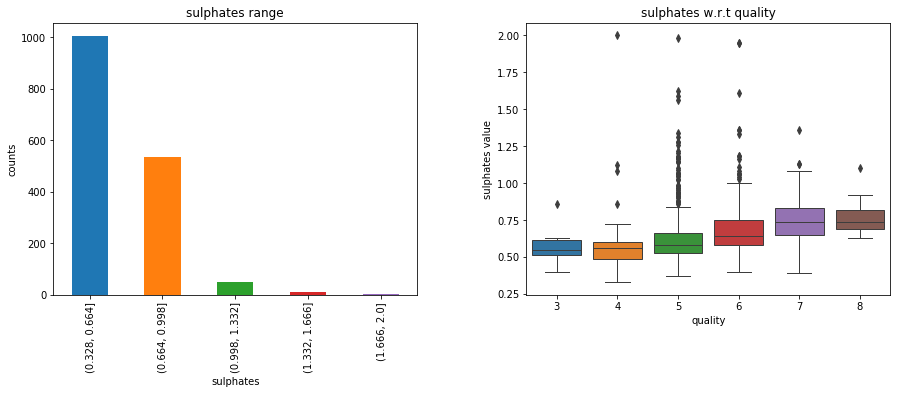

,count,mean,std,min,25%,50%,75%,max
sulphates,1599.0,0.658149,0.169507,0.33,0.55,0.62,0.73,2.0


In [21]:
# sulphates Analysis 
print(' ----sulphates data occurance based on range -----')

plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.3, wspace =0.3)

plt.subplot(1,2,1)
print(pd.cut(wine_data_fromCSVFile['sulphates'],5).value_counts().sort_index())
pd.cut(wine_data_fromCSVFile['sulphates'],5).value_counts().sort_index().plot.bar()
plt.xlabel('sulphates')
plt.ylabel('counts')
plt.title('sulphates range')

plt.subplot(1,2,2)
sns.boxplot(x='quality',y='sulphates',data=wine_data_fromCSVFile,linewidth=1)
plt.ylabel('sulphates value')
plt.title('sulphates w.r.t quality')

plt.show()

wine_data_fromCSVFile[['sulphates']].describe().T

### mostly data is in range (0.497, 0.664)
### all groups have some outliers on higher side, but max is incase of group 5

 ----alcohol data occurance based on range -----


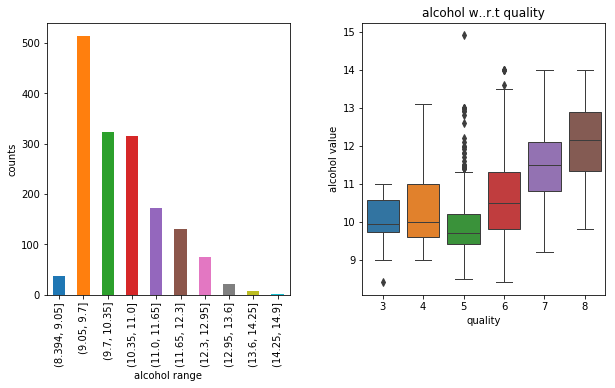

,count,mean,std,min,25%,50%,75%,max
alcohol,1599.0,10.422983,1.065668,8.4,9.5,10.2,11.1,14.9


In [22]:
# alcohol anaylisys
print(' ----alcohol data occurance based on range -----')

plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.3, wspace =0.3)

plt.subplot(1,2,1)
#print(pd.cut(wine_data_fromCSVFile['alcohol'],10).value_counts().sort_index())
pd.cut(wine_data_fromCSVFile['alcohol'],10).value_counts().sort_index().plot.bar()
plt.xlabel('alcohol range')
plt.ylabel('counts')

plt.subplot(1,2,2)
sns.boxplot(x='quality',y='alcohol',data=wine_data_fromCSVFile,linewidth=1)
plt.ylabel('alcohol value')
plt.title('alcohol w..r.t quality')

plt.show()

wine_data_fromCSVFile[['alcohol']].describe().T

### most of the data lies between range (9.05, 9.7)

## alcohol content analysis w.r.t wine-quality
### interquartile range of alcohol content increase when quality-increase

### quality-3 have lowest median value
### quality-4 have large number which have large 4th quartile range
### quality-5 & quality-6 have some outliers
### quality-5 have maximum number of outlier 
### quality-7 & quality-8 have mean & median value approx same
### quality-7 & quality-8 have high median value of alcohol content as compare to other groups

In [23]:
## correlation of wine attributes, but better will be to corr w.r.t to each quality or group_quality
wine_corr=wine_data_fromCSVFile.corr()
wine_corr

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
fixedacidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatileacidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citricacid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residualsugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
freesulfurdioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
totalsulfurdioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


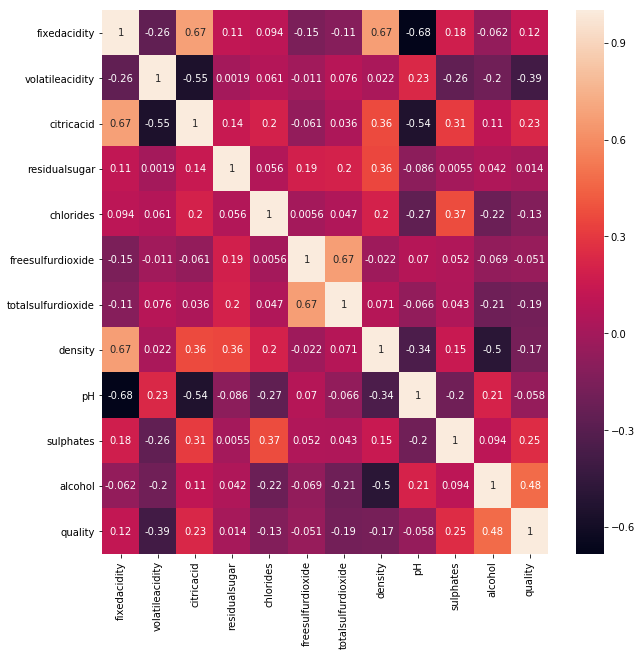

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_corr,annot=True)

<Figure size 360x360 with 0 Axes>

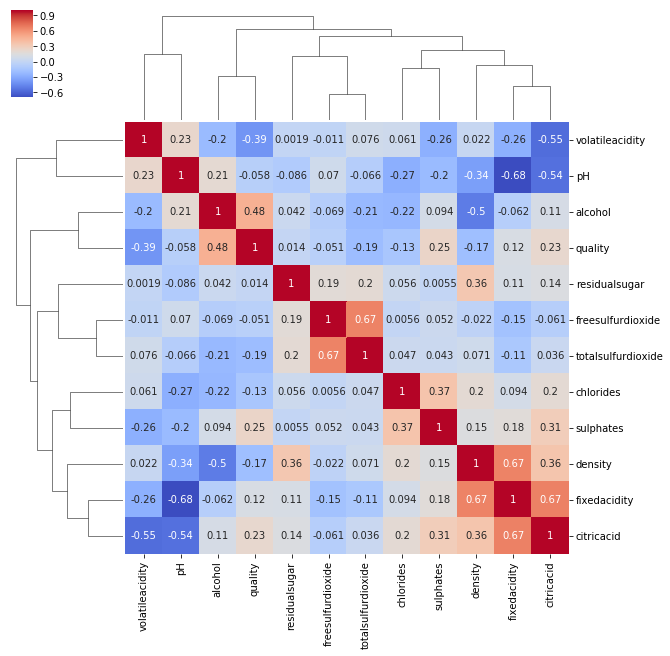

In [25]:
plt.figure(figsize=(5,5))
sns.clustermap(wine_corr,annot = True, cmap='coolwarm')

## count for each wine quality_group 

In [26]:
wineGroup=wine_data_fromCSVFile.groupby('quality',axis=0).size().reset_index(name='counts') # grouping records as per quality group and counting its number
total_wine_count=wineGroup.counts.sum() # total number of counts in 'wineGroup'

#wineGroup['perc']=wineGroup.counts/1599*100
# Adding column 'perc' to calculate how much percentage it is of total dataset
wineGroup['percentage']=wineGroup.counts.apply(lambda x:x/total_wine_count *100)

# sns.countplot(x='quality',data=wine_data_fromCSVFile)
# plt.show()

wineGroup

,quality,counts,percentage
0,3,10,0.625391
1,4,53,3.314572
2,5,681,42.589118
3,6,638,39.899937
4,7,199,12.445278
5,8,18,1.125704


### wine-data are mostly for quality 5 & quality 6.
### above chart shows 'count' & its 'percentage' for each quality in wine-data-set

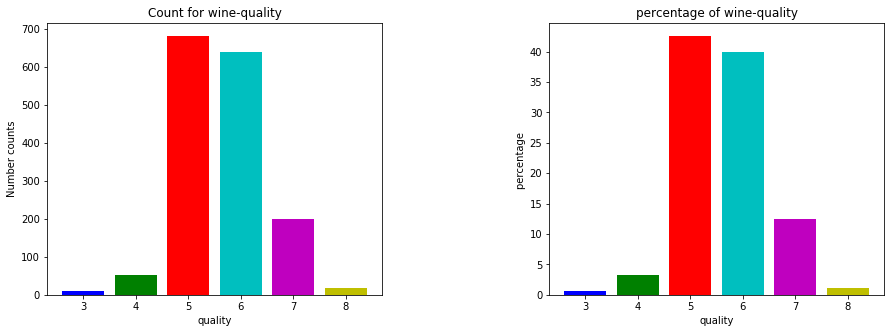

In [27]:
## Visualization of quality-count 

plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace= 0.2, wspace= 0.5)

col = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.subplot(1,2,1)
plt.bar('quality','counts',data=wineGroup, color=col)
plt.xlabel('quality')
plt.ylabel('Number counts')
plt.title('Count for wine-quality')

plt.subplot(1,2,2)
plt.bar('quality','percentage',data=wineGroup,color=col)
plt.xlabel('quality')
plt.ylabel('percentage ')
plt.title('percentage of wine-quality')

plt.show()

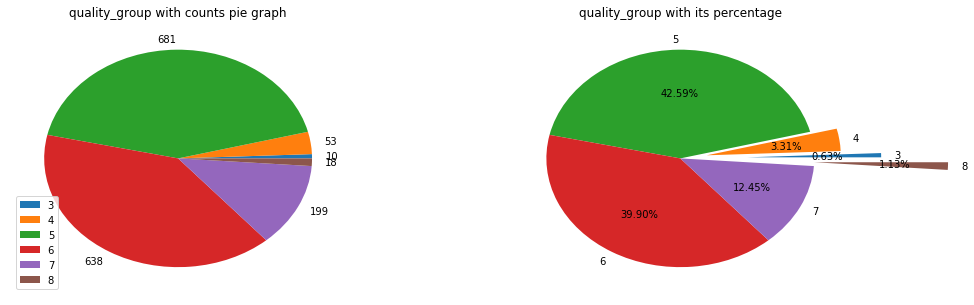

In [28]:
## visualization using pie chart
# show count & percentage based on wine_group in the same figure 

explode =[0.5,0.2,0,0,0,1]

plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace= 0.2, wspace= 0.5)

plt.subplot(1,2,1)
plt.pie(wineGroup.counts ,labels=wineGroup.counts )
plt.legend(wineGroup.quality,loc=3)
plt.title("quality_group with counts pie graph")

plt.subplot(1,2,2)
plt.pie(wineGroup.counts, labels=wineGroup.quality, autopct='%1.2f%%' ,explode=explode)
plt.title("quality_group with its percentage")
plt.show()

### Analyzing wine-data using mean for each wine-quality

In [29]:
### analyzing each wine quality using mean value 
wine_grp_quality_usingMean=wine_data_fromCSVFile.groupby('quality',axis=0).mean().reset_index()
wine_grp_quality_usingMean

,quality,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
0,3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
2,5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
3,6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
4,7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
5,8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [30]:
wine_grp_quality_usingMean_corr = wine_grp_quality_usingMean.corr()
wine_grp_quality_usingMean_corr

,quality,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
quality,1.000000,0.651620,-0.949119,0.972431,-0.145731,-0.920145,0.374970,0.118716,-0.883380,-0.940445,0.985884,0.907453
fixedacidity,0.651620,1.000000,-0.553962,0.795566,0.103282,-0.356670,0.068188,-0.260906,-0.419476,-0.608999,0.733516,0.667928
volatileacidity,-0.949119,-0.553962,1.000000,-0.901973,0.160735,0.945009,-0.572284,-0.335633,0.770868,0.932916,-0.912122,-0.765884
citricacid,0.972431,0.795566,-0.901973,1.000000,-0.025673,-0.833314,0.294978,0.024944,-0.830018,-0.920308,0.986740,0.913850
residualsugar,-0.145731,0.103282,0.160735,-0.025673,1.000000,0.057806,-0.635989,-0.508754,-0.103023,0.294474,-0.024062,0.140925
chlorides,-0.920145,-0.356670,0.945009,-0.833314,0.057806,1.000000,-0.412967,-0.258357,0.891039,0.849751,-0.879625,-0.808522
freesulfurdioxide,0.374970,0.068188,-0.572284,0.294978,-0.635989,-0.412967,1.000000,0.908935,-0.005796,-0.607430,0.246233,-0.049001
totalsulfurdioxide,0.118716,-0.260906,-0.335633,0.024944,-0.508754,-0.258357,0.908935,1.000000,0.140621,-0.394849,-0.028238,-0.281133
density,-0.883380,-0.419476,0.770868,-0.830018,-0.103023,0.891039,-0.005796,0.140621,1.000000,0.720483,-0.891547,-0.951095
pH,-0.940445,-0.608999,0.932916,-0.920308,0.294474,0.849751,-0.607430,-0.394849,0.720483,1.000000,-0.890714,-0.737528


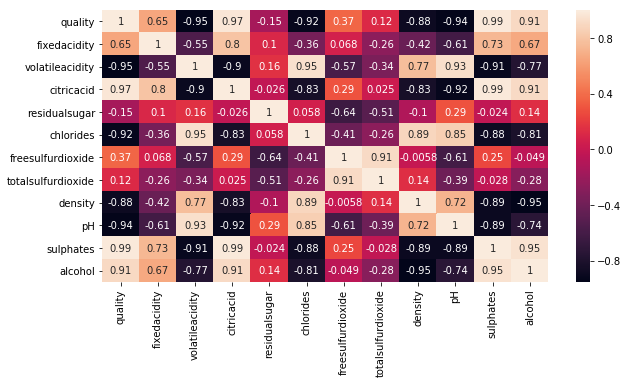

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(data=wine_grp_quality_usingMean_corr,annot=True)
plt.show()

In [ ]:
# plt.plot(wine_grp_quality_usingMean,label=wine_grp_quality_usingMean.columns)
# plt.show()

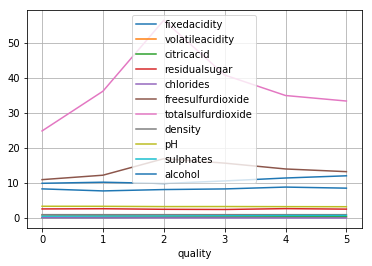

In [32]:
wine_grp_quality_usingMean.drop(['quality'],axis=1).plot(grid=True)
plt.xlabel('quality')
plt.show()

## lets visualize each attribute w.r.t quality as above plot says many attributes are consistent

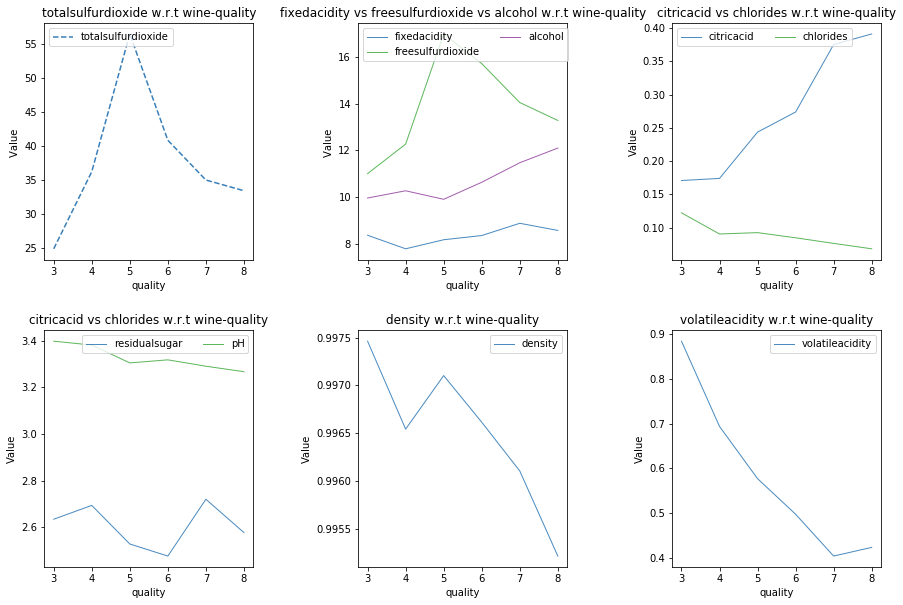

In [33]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace= 0.3, wspace= 0.5)
#plt.style.use('dark_background')

num=0
palette =plt.get_cmap("Set1")

plt.subplot(2,3,1)
for column in wine_grp_quality_usingMean[['totalsulfurdioxide']]:
    num+=1
    plt.plot(wine_grp_quality_usingMean['quality'], wine_grp_quality_usingMean[column], color=palette(num), label=column,linestyle='dashed' )
plt.legend(loc=2,ncol=2)
plt.xlabel('quality')
plt.ylabel('Value ')
plt.title('totalsulfurdioxide w.r.t wine-quality')

num=0
plt.subplot(2,3,2)
for column in wine_grp_quality_usingMean[['fixedacidity','freesulfurdioxide','alcohol']]:
    num+=1
    plt.plot(wine_grp_quality_usingMean.quality, wine_grp_quality_usingMean[column], color=palette(num), linewidth=1, alpha=0.9,  label=column )
plt.legend(loc=2,ncol=2)
plt.xlabel('quality')
plt.ylabel('Value ')
plt.title('fixedacidity vs freesulfurdioxide vs alcohol w.r.t wine-quality')

num=0
plt.subplot(2,3,3)
for column in wine_grp_quality_usingMean[['citricacid','chlorides']]:
    num+=1
    plt.plot(wine_grp_quality_usingMean.quality, wine_grp_quality_usingMean[column], color=palette(num), linewidth=1, alpha=0.9,  label=column )
plt.legend(loc=2,ncol=2)
plt.xlabel('quality')
plt.ylabel('Value')
plt.title('citricacid vs chlorides w.r.t wine-quality')

num=0
plt.subplot(2,3,4)
for column in wine_grp_quality_usingMean[['residualsugar','pH']]:
    num+=1
    plt.plot(wine_grp_quality_usingMean.quality, wine_grp_quality_usingMean[column], color=palette(num), linewidth=1, alpha=0.9,  label=column )
plt.legend(loc=1,ncol=2)
plt.xlabel('quality')
plt.ylabel('Value')
plt.title('citricacid vs chlorides w.r.t wine-quality')

num=0
plt.subplot(2,3,5)
for column in wine_grp_quality_usingMean[['density']]:
    num+=1
    plt.plot(wine_grp_quality_usingMean.quality, wine_grp_quality_usingMean[column], color=palette(num), linewidth=1, alpha=0.9,  label=column )
plt.legend(loc=1,ncol=2)
plt.xlabel('quality')
plt.ylabel('Value')
plt.title('density w.r.t wine-quality')

num=0
plt.subplot(2,3,6)
for column in wine_grp_quality_usingMean[['volatileacidity']]:
    num+=1
    plt.plot(wine_grp_quality_usingMean.quality, wine_grp_quality_usingMean[column], color=palette(num), linewidth=1, alpha=0.9,  label=column )
plt.legend(loc=1,ncol=2)
plt.xlabel('quality')
plt.ylabel('Value')
plt.title('volatileacidity w.r.t wine-quality')

plt.show()

In [ ]:
#wine_grp_quality_usingMean.head()

### 
#### 1- alcohol,citricacid contents increase w.r.t to quality (+ impact)
#### 2- chloride,pH decreases w.r.t Quality (-ve impact)

### so  alcohol,citricacid & chloride,pH are inversely proprotational to each other 

#### 3- volatile volatileacidity decreases except for quality-8

#### 4- totalsulfurdioxide, freesulfurdioxide, residualsugar are having mix observation 
#### 5- totalsulfurdioxide,freesulfurdioxide increase for quality3,4,5 while then it decreases 

## dividing wine-quality into 3 category 

### Bad-quality - quality 3&4
### avg-quality - quality 5&6
### Good-quality - quality 7&8

In [34]:
## adding column as 'quality_grp' with default value 'Nan'
wine_data_quality_grp = wine_data_fromCSVFile
wine_data_quality_grp['quality_grp']='Nan'

wine_data_quality_grp.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,quality_grp
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Nan
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Nan
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Nan
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Nan
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Nan


### Assigning quality_group to wine-data set

In [35]:
## assigning bad quality if 'quality' is 3,4 (<5) 
wine_data_quality_grp.loc[ ( (wine_data_quality_grp.quality >=3) & (wine_data_quality_grp.quality <=4) ) , 'quality_grp'] ='Bad_3_4'

## assigning Avg quality if 'quality' is 5,6 (<7)
wine_data_quality_grp.loc[ ( (wine_data_quality_grp.quality >=5) & (wine_data_quality_grp.quality <= 6) ) , 'quality_grp'] ='Avg_5_6'

## assigning Avg quality if 'quality' is 7,8 (<7)
wine_data_quality_grp.loc[ ( (wine_data_quality_grp.quality >=7) & (wine_data_quality_grp.quality <=8) ) , 'quality_grp'] ='Good_7_8'

wine_data_quality_grp.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,quality_grp
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Avg_5_6
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Avg_5_6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Avg_5_6
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Avg_5_6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Avg_5_6


Avg_5_6     1319
Good_7_8     217
Bad_3_4       63
Name: quality_grp, dtype: int64

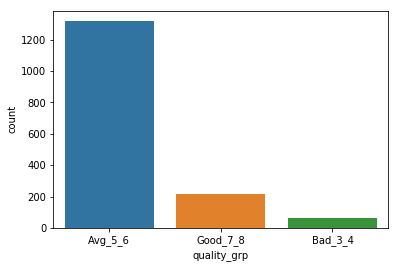

In [36]:
sns.countplot(x='quality_grp',data=wine_data_quality_grp)
wine_data_quality_grp.quality_grp.value_counts()

### avg_quality wine is having max number in data-set

In [ ]:
#wine_data_quality_grp( wine_data_quality_grp['quality_grp'] == "Avg_5_6").describe()
#wine_data_quality_grp.loc[((wine_data_quality_grp.quality_grp == "Avg_5_6"))].drop(['quality'],axis=1).describe()

In [37]:
wine_data_quality_grp_Bad=wine_data_quality_grp.loc[((wine_data_quality_grp.quality_grp == "Bad_3_4"))].drop(['quality'],axis=1)
wine_data_quality_grp_Bad.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873
std,1.649284,0.247970,0.207406,1.723735,0.075121,9.076508,26.395123,0.001667,0.175100,0.224323,0.918178
min,4.600000,0.230000,0.000000,1.200000,0.045000,3.000000,7.000000,0.993400,2.740000,0.330000,8.400000
25%,6.800000,0.565000,0.020000,1.900000,0.068500,5.000000,13.500000,0.995655,3.300000,0.495000,9.600000
50%,7.500000,0.680000,0.080000,2.100000,0.080000,9.000000,26.000000,0.996600,3.380000,0.560000,10.000000
75%,8.400000,0.882500,0.270000,2.950000,0.094500,15.500000,48.000000,0.997700,3.500000,0.600000,11.000000
max,12.500000,1.580000,1.000000,12.900000,0.610000,41.000000,119.000000,1.001000,3.900000,2.000000,13.100000


In [38]:
wine_data_quality_grp_avg=wine_data_quality_grp.loc[((wine_data_quality_grp.quality_grp == "Avg_5_6"))].drop(['quality'],axis=1)
wine_data_quality_grp_avg.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717
std,1.682935,0.167679,0.187995,1.399633,0.047538,10.492335,32.714030,0.001815,0.152345,0.167334,0.972354
min,4.700000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.860000,0.370000,8.400000
25%,7.100000,0.410000,0.090000,1.900000,0.071000,8.000000,24.000000,0.995800,3.210000,0.540000,9.500000
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,40.000000,0.996800,3.310000,0.610000,10.000000
75%,9.100000,0.640000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.400000,0.700000,10.900000
max,15.900000,1.330000,0.790000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,1.980000,14.900000


In [39]:
wine_data_quality_grp_good=wine_data_quality_grp.loc[((wine_data_quality_grp.quality_grp == "Good_7_8"))].drop(['quality'],axis=1)
wine_data_quality_grp_good.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000


In [ ]:
#wine_data_quality_grp.groupby('quality_grp').alcohol.describe()

In [ ]:
#wine_data_quality_grp.groupby('quality_grp').corr()

In [ ]:
#wine_data_quality_grp.head()

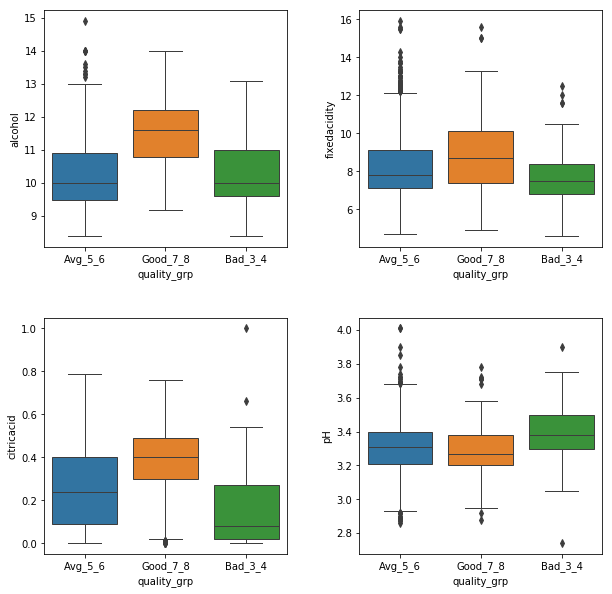

In [40]:
#sns.boxplot(x='quality',y='alcohol',data=wine_data_fromCSVFile,linewidth=1)
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2,2,1)
sns.boxplot(x='quality_grp',y='alcohol',data=wine_data_quality_grp,linewidth=1)

plt.subplot(2,2,2)
sns.boxplot(x='quality_grp',y='fixedacidity',data=wine_data_quality_grp,linewidth=1)

plt.subplot(2,2,3)
sns.boxplot(x='quality_grp',y='citricacid',data=wine_data_quality_grp,linewidth=1)

plt.subplot(2,2,4)
sns.boxplot(x='quality_grp',y='pH',data=wine_data_quality_grp,linewidth=1)

plt.show()

In [41]:
#wine_data_quality_grp_summary = wine_data_quality_grp.drop(['quality'],axis=1).groupby('quality_grp').mean()
wine_data_quality_grp_summary = wine_data_quality_grp.drop(['quality'],axis=1).groupby('quality_grp').median()
wine_data_quality_grp_summary

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
quality_grp,,,,,,,,,,,
Avg_5_6,7.8,0.54,0.24,2.2,0.080,14.0,40.0,0.99680,3.31,0.61,10.0
Bad_3_4,7.5,0.68,0.08,2.1,0.080,9.0,26.0,0.99660,3.38,0.56,10.0
Good_7_8,8.7,0.37,0.40,2.3,0.073,11.0,27.0,0.99572,3.27,0.74,11.6


In [42]:
t_avg=pd.DataFrame(wine_data_quality_grp_summary.loc['Avg_5_6',:]).T
t_good=pd.DataFrame(wine_data_quality_grp_summary.loc['Good_7_8',:]).T

In [43]:
#t_good=pd.DataFrame(wine_data_quality_grp_summary.loc['Good_7_8',:]).T
t_good

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
Good_7_8,8.7,0.37,0.4,2.3,0.073,11.0,27.0,0.99572,3.27,0.74,11.6


In [44]:
wine_data_quality_grp_summary.drop(wine_data_quality_grp_summary.index[[0,2]],inplace=True)
wine_data_quality_grp_summary

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
quality_grp,,,,,,,,,,,
Bad_3_4,7.5,0.68,0.08,2.1,0.08,9.0,26.0,0.9966,3.38,0.56,10.0


In [45]:
wine_data_quality_grp_summary = wine_data_quality_grp_summary.append(t_avg)
wine_data_quality_grp_summary = wine_data_quality_grp_summary.append(t_good)
wine_data_quality_grp_summary

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
Bad_3_4,7.5,0.68,0.08,2.1,0.080,9.0,26.0,0.99660,3.38,0.56,10.0
Avg_5_6,7.8,0.54,0.24,2.2,0.080,14.0,40.0,0.99680,3.31,0.61,10.0
Good_7_8,8.7,0.37,0.40,2.3,0.073,11.0,27.0,0.99572,3.27,0.74,11.6


In [46]:
wine_data_quality_grp_summary

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
Bad_3_4,7.5,0.68,0.08,2.1,0.080,9.0,26.0,0.99660,3.38,0.56,10.0
Avg_5_6,7.8,0.54,0.24,2.2,0.080,14.0,40.0,0.99680,3.31,0.61,10.0
Good_7_8,8.7,0.37,0.40,2.3,0.073,11.0,27.0,0.99572,3.27,0.74,11.6


In [47]:
wine_data_quality_grp_summary.corr()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol
fixedacidity,1.000000,-0.974745,0.960769,0.960769,-0.970725,0.127257,-0.215274,-0.914107,-0.905936,0.999554,0.970725
volatileacidity,-0.974745,1.000000,-0.998443,-0.998443,0.892570,-0.345549,-0.008248,0.800470,0.977614,-0.980977,-0.892570
citricacid,0.960769,-0.998443,1.000000,1.000000,-0.866025,0.397360,0.064018,-0.765787,-0.987829,0.968620,0.866025
residualsugar,0.960769,-0.998443,1.000000,1.000000,-0.866025,0.397360,0.064018,-0.765787,-0.987829,0.968620,0.866025
chlorides,-0.970725,0.892570,-0.866025,-0.866025,1.000000,0.114708,0.443533,0.984738,0.777714,-0.963123,-1.000000
freesulfurdioxide,0.127257,-0.345549,0.397360,0.397360,0.114708,1.000000,0.941219,0.285851,-0.535259,0.156807,-0.114708
totalsulfurdioxide,-0.215274,-0.008248,0.064018,0.064018,0.443533,0.941219,1.000000,0.592751,-0.218463,-0.186029,-0.443533
density,-0.914107,0.800470,-0.765787,-0.765787,0.984738,0.285851,0.592751,1.000000,0.656438,-0.901596,-0.984738
pH,-0.905936,0.977614,-0.987829,-0.987829,0.777714,-0.535259,-0.218463,0.656438,1.000000,-0.918171,-0.777714
sulphates,0.999554,-0.980977,0.968620,0.968620,-0.963123,0.156807,-0.186029,-0.901596,-0.918171,1.000000,0.963123


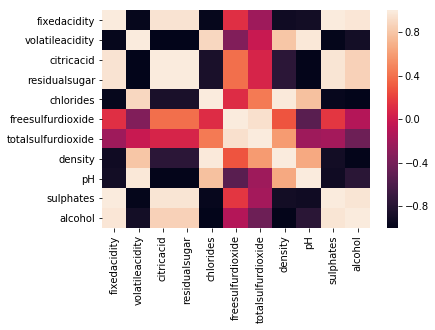

In [48]:
sns.heatmap(data=wine_data_quality_grp_summary.corr())

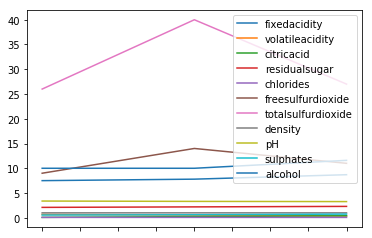

In [49]:
wine_data_quality_grp_summary.plot()

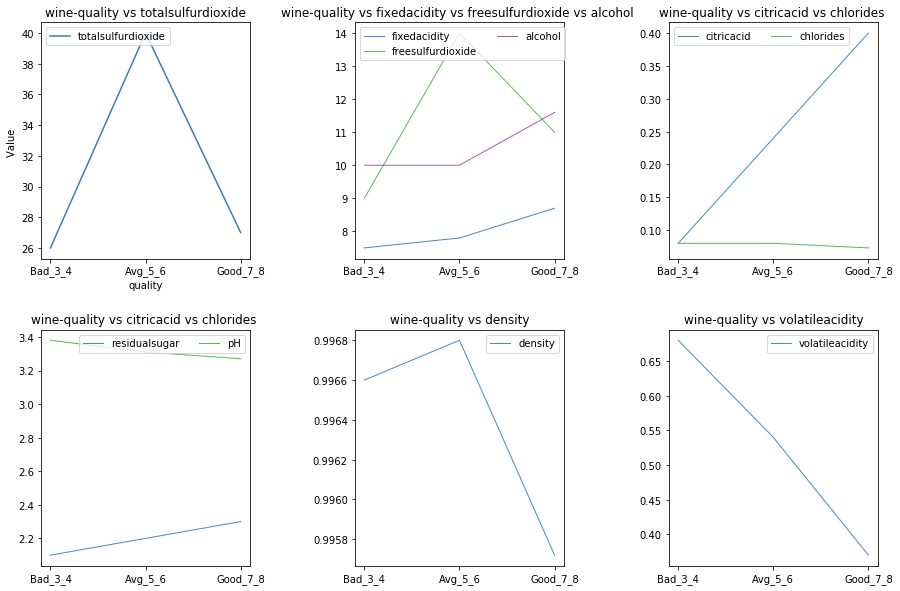

In [50]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace= 0.3, wspace= 0.5)

num=0
palette =plt.get_cmap("Set1")

plt.subplot(2,3,1)
for column in wine_data_quality_grp_summary[['totalsulfurdioxide']]:
    num+=1
    plt.plot(wine_data_quality_grp_summary.index, wine_data_quality_grp_summary[column], color=palette(num), label=column )
plt.legend(loc=2,ncol=2)
plt.xlabel('quality')
plt.ylabel('Value ')
plt.title('wine-quality vs totalsulfurdioxide')

num=0
plt.subplot(2,3,2)
for column in wine_data_quality_grp_summary[['fixedacidity','freesulfurdioxide','alcohol']]:
    num+=1
    plt.plot(wine_data_quality_grp_summary.index, wine_data_quality_grp_summary[column], color=palette(num), linewidth=1, alpha=0.9,  label=column )
plt.legend(loc=2,ncol=2)
plt.title('wine-quality vs fixedacidity vs freesulfurdioxide vs alcohol ')

num=0
plt.subplot(2,3,3)
for column in wine_data_quality_grp_summary[['citricacid','chlorides']]:
    num+=1
    plt.plot(wine_data_quality_grp_summary.index, wine_data_quality_grp_summary[column], color=palette(num), linewidth=1, alpha=0.9,  label=column )
plt.legend(loc=2,ncol=2)
plt.title('wine-quality vs citricacid vs chlorides ')

num=0
plt.subplot(2,3,4)
for column in wine_data_quality_grp_summary[['residualsugar','pH']]:
    num+=1
    plt.plot(wine_data_quality_grp_summary.index, wine_data_quality_grp_summary[column], color=palette(num), linewidth=1, alpha=0.9,  label=column )
plt.legend(loc=1,ncol=2)
plt.title('wine-quality vs citricacid vs chlorides ')

num=0
plt.subplot(2,3,5)
for column in wine_data_quality_grp_summary[['density']]:
    num+=1
    plt.plot(wine_data_quality_grp_summary.index, wine_data_quality_grp_summary[column], color=palette(num), linewidth=1, alpha=0.9,  label=column )
plt.legend(loc=1,ncol=2)
plt.title('wine-quality vs density')

num=0
plt.subplot(2,3,6)
for column in wine_data_quality_grp_summary[['volatileacidity']]:
    num+=1
    plt.plot(wine_data_quality_grp_summary.index, wine_data_quality_grp_summary[column], color=palette(num), linewidth=1, alpha=0.9,  label=column )
plt.legend(loc=1,ncol=2)
plt.title('wine-quality vs volatileacidity')

plt.show()

### End Last line ------